# Noticias Falsas El Pais

## 1. Web Scraping

El web scraping se realizó utilizando la biblioteca BeautifulSoup en Python para extraer datos de noticias falsas del periódico "El País". Se construyó una URL base y se iteró a través de múltiples páginas web utilizando un bucle while. Se hizo una solicitud HTTP a cada página y se analizó el contenido HTML con BeautifulSoup para buscar elementos "article" que contienen las noticias. Luego, se extrajeron la categoría, el título, el autor, la fecha de publicación y la descripción de cada noticia y se escribieron en un archivo CSV. Finalmente, se incrementó el número de página para continuar con el siguiente lote de noticias falsas. El resultado fue un archivo CSV con los datos recopilados de las noticias falsas del periódico "El País".

In [ ]:
pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv

base_url = "https://elpais.com/noticias/noticias-falsas/"
page_number = 1

# Abre el archivo CSV para escribir los datos recopilados
with open('noticias_falsas_el_pais.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Categoría", "Título", "Autor", "Fecha de publicación", "Descripción"])

    while True:
        # Construye la URL de la página actual
        page_url = base_url + str(page_number) + "/"

        # Realiza la solicitud HTTP a la página
        page = requests.get(page_url)

        # Crea un objeto BeautifulSoup para analizar el contenido HTML
        soup = BeautifulSoup(page.content, 'html.parser')

        # Busca todos los elementos <article> que contienen las noticias
        article_items = soup.find_all("article")

        # Si no se encuentran más elementos <article>, se ha alcanzado el final de las páginas
        if not article_items:
            break

        # Itera sobre cada elemento <article> y extrae los datos necesarios
        for article in article_items:
            # Extrae la categoría de la noticia si está disponible
            category_elem = article.find("a", class_="c_k")
            category = category_elem.text.strip() if category_elem else "Sin categoría"

            # Extrae el título de la noticia
            title = article.find("h2", class_="c_t").text.strip()

            # Extrae el autor de la noticia si está disponible
            author_elem = article.find("a", class_="c_a_a")
            author = author_elem.text.strip() if author_elem else "El Pais"

            # Extrae la fecha de publicación de la noticia si está disponible
            pub_date_elem = article.find("span", class_="c_a_t")
            pub_date = pub_date_elem.text.strip().replace("|", "") if pub_date_elem else ""

            # Extrae la descripción de la noticia si está disponible
            description_elem = article.find("p", class_="c_d")
            description = description_elem.text.strip() if description_elem else ""

            # Escribe los datos en el archivo CSV
            writer.writerow([category, title, author, pub_date, description])
            print([category, title, author, pub_date, description])

        # Incrementa el número de página para pasar a la siguiente
        page_number += 1


['Columna', 'Palabras que nunca tienen consecuencias', 'Lluís Bassets', '13 ago 2023 - 05:00 CEST', 'Donald Trump busca cobijo en la libertad de expresión para defender sus mentiras y manipulaciones electorales']
['Pamplinas', 'La palabra periodismo', 'Martín Caparrós', '12 ago 2023 - 05:00 CEST', 'Ahora la información llega en cualquier momento. Algunos lo llamarían continuismo, pero suena a otra cosa']
['Bulos internet', 'El día que Twitter mató a Savater y Perales y era mentira: así se difunden los bulos sobre la muerte de famosos', 'Clara Angela Brascia', '08 ago 2023 - 13:19 CEST', 'Con la agenda informativa de verano a medio gas, es más fácil viralizar noticias falsas creadas por cuentas que buscan atención o engañar a los medios, como el “campeón de la mentira” Tommaso Debenedetti']
['Elecciones EE UU', 'DeSantis reconoce que Biden ganó las elecciones de 2020 y enmienda la plana a Trump: “Por supuesto que perdió”', 'Macarena Vidal Liy', '07 ago 2023 - 22:40 CEST', 'El candidato 

Realizamos una nueva versión, incluyendo el enlace de cada noticia

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv

base_url = "https://elpais.com/noticias/noticias-falsas/"
page_number = 1

# Abre el archivo CSV para escribir los datos recopilados
with open('noticias_falsas_el_pais.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Categoría", "Título", "Autor", "Fecha de publicación", "Descripción", "Enlace"])

    while True:
        # Construye la URL de la página actual
        page_url = base_url + str(page_number) + "/"

        # Realiza la solicitud HTTP a la página
        page = requests.get(page_url)

        # Crea un objeto BeautifulSoup para analizar el contenido HTML
        soup = BeautifulSoup(page.content, 'html.parser')

        # Busca todos los elementos <article> que contienen las noticias
        article_items = soup.find_all("article")

        # Si no se encuentran más elementos <article>, se ha alcanzado el final de las páginas
        if not article_items:
            break

        # Itera sobre cada elemento <article> y extrae los datos necesarios
        for article in article_items:
            # Extrae la categoría de la noticia si está disponible
            category_elem = article.find("a", class_="c_k")
            category = category_elem.text.strip() if category_elem else "Sin categoría"

            # Extrae el título de la noticia
            title_elem = article.find("h2", class_="c_t")
            title = title_elem.text.strip() if title_elem else ""

            # Extrae el autor de la noticia si está disponible
            author_elem = article.find("a", class_="c_a_a")
            author = author_elem.text.strip() if author_elem else "El Pais"

            # Extrae la fecha de publicación de la noticia si está disponible
            pub_date_elem = article.find("span", class_="c_a_t")
            pub_date = pub_date_elem.text.strip().replace("|", "") if pub_date_elem else ""

            # Extrae la descripción de la noticia si está disponible
            description_elem = article.find("p", class_="c_d")
            description = description_elem.text.strip() if description_elem else ""

            # Extrae el enlace de la noticia si está disponible
            link = title_elem.find("a")["href"] if title_elem and title_elem.find("a") else ""

            # Escribe los datos en el archivo CSV
            writer.writerow([category, title, author, pub_date, description, link])
            print([category, title, author, pub_date, description, link])

        # Incrementa el número de página para pasar a la siguiente
        page_number += 1


['Columna', 'Palabras que nunca tienen consecuencias', 'Lluís Bassets', '13 ago 2023 - 05:00 CEST', 'Donald Trump busca cobijo en la libertad de expresión para defender sus mentiras y manipulaciones electorales', 'https://elpais.com/opinion/2023-08-13/palabras-que-nunca-tienen-consecuencias.html']
['Pamplinas', 'La palabra periodismo', 'Martín Caparrós', '12 ago 2023 - 05:00 CEST', 'Ahora la información llega en cualquier momento. Algunos lo llamarían continuismo, pero suena a otra cosa', 'https://elpais.com/eps/2023-08-12/la-palabra-periodismo.html']
['Bulos internet', 'El día que Twitter mató a Savater y Perales y era mentira: así se difunden los bulos sobre la muerte de famosos', 'Clara Angela Brascia', '08 ago 2023 - 13:19 CEST', 'Con la agenda informativa de verano a medio gas, es más fácil viralizar noticias falsas creadas por cuentas que buscan atención o engañar a los medios, como el “campeón de la mentira” Tommaso Debenedetti', 'https://elpais.com/tecnologia/2023-08-08/el-dia-

In [ ]:
pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv('/content/noticias_falsas_el_pais.csv')

El dataset contiene información sobre noticias falsas recopiladas del sitio web "El País". Cada fila representa una noticia con sus respectivos atributos. Estos datos pueden ser útiles para realizar análisis y estudios sobre noticias falsas, como su temática, autoría, fechas de publicación y descripciones. Con esta información, los investigadores o analistas podrían estudiar las características y tendencias de las noticias falsas presentadas en el sitio web y examinar la propagación de la desinformación en línea.

Aquí está la descripción de cada variable:

- **Categoría**: Representa la categoría o tema de la noticia falsa. Siempre será una cadena de texto. Si no se puede extraer la categoría de la noticia, se establecerá como "Sin categoría".

- **Título:** Es el título de la noticia falsa. Es una cadena de texto que describe brevemente el contenido de la noticia.

- **Autor:** Indica el autor de la noticia. Es una cadena de texto que representa el nombre del autor o el nombre del medio "El País" si no se puede extraer el autor.

- **Fecha de publicación:** Muestra la fecha de publicación de la noticia falsa. Es una cadena de texto que representa la fecha y puede incluir la hora en ciertos casos.

- **Descripción:** Proporciona una breve descripción o resumen del contenido de la noticia falsa. Es una cadena de texto que contiene el texto descriptivo.

- **Enlace:** Representa el enlace (URL) a la noticia falsa completa en el sitio web "El País". Es una cadena de texto que contiene la dirección web de la noticia.

In [ ]:
dataframe.head()

,Categoría,Título,Autor,Fecha de publicación,Descripción,Enlace
0,Columna,Palabras que nunca tienen consecuencias,Lluís Bassets,13 ago 2023 - 05:00 CEST,Donald Trump busca cobijo en la libertad de ex...,https://elpais.com/opinion/2023-08-13/palabras...
1,Pamplinas,La palabra periodismo,Martín Caparrós,12 ago 2023 - 05:00 CEST,Ahora la información llega en cualquier moment...,https://elpais.com/eps/2023-08-12/la-palabra-p...
2,Bulos internet,El día que Twitter mató a Savater y Perales y ...,Clara Angela Brascia,08 ago 2023 - 13:19 CEST,Con la agenda informativa de verano a medio ga...,https://elpais.com/tecnologia/2023-08-08/el-di...
3,Elecciones EE UU,DeSantis reconoce que Biden ganó las eleccione...,Macarena Vidal Liy,07 ago 2023 - 22:40 CEST,El candidato republicano se pronuncia por prim...,https://elpais.com/internacional/2023-08-07/de...
4,Columna,Un vasto programa,Bernat Castany Prado,07 ago 2023 - 05:00 CEST,Hay que aprender a someter la opinión personal...,https://elpais.com/opinion/2023-08-07/un-vasto...


## 2. Text Mining Analysis

### WordCloud

Se obtiene una nube de palabras que muestre solo las palabras más relevantes en las descripciones de las noticias falsas, sin incluir palabras comunes como preposiciones o artículos.

In [ ]:
pip install pandas matplotlib wordcloud


In [ ]:
pip install nltk


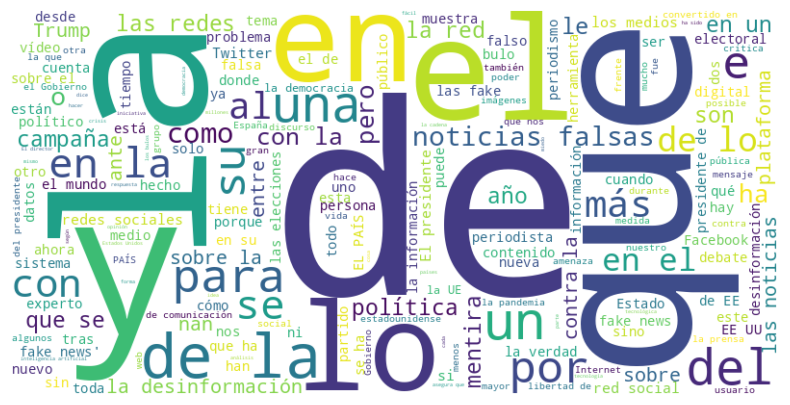

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Convierte los valores de la columna "Descripción" a cadenas (str)
df['Descripción'] = df['Descripción'].astype(str)

# Concatena todas las descripciones en un solo texto
descriptions_text = ' '.join(df['Descripción'])

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions_text)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



Eliminamos las stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


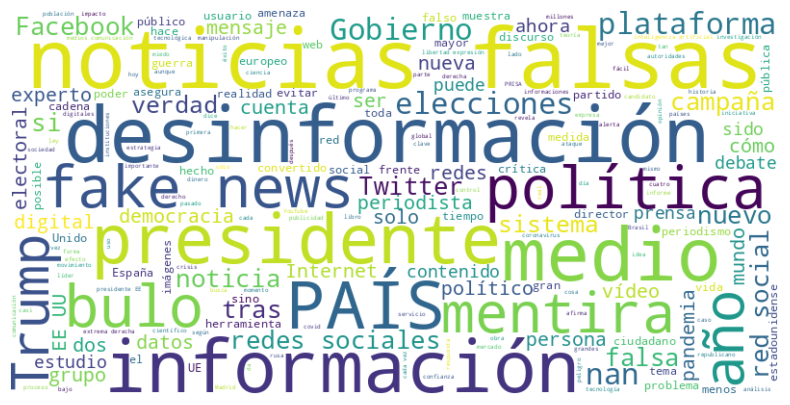

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar las stopwords si no están descargadas previamente
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Convierte los valores de la columna "Descripción" a cadenas (str)
df['Descripción'] = df['Descripción'].astype(str)

# Concatena todas las descripciones en un solo texto
descriptions_text = ' '.join(df['Descripción'])

# Tokeniza el texto (divide el texto en palabras individuales)
tokens = word_tokenize(descriptions_text)

# Crea un conjunto de stopwords en español
spanish_stopwords = set(stopwords.words('spanish'))

# Filtra las stopwords del conjunto de tokens
filtered_tokens = [word for word in tokens if word.lower() not in spanish_stopwords]

# Une las palabras filtradas en un solo texto
filtered_text = ' '.join(filtered_tokens)

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


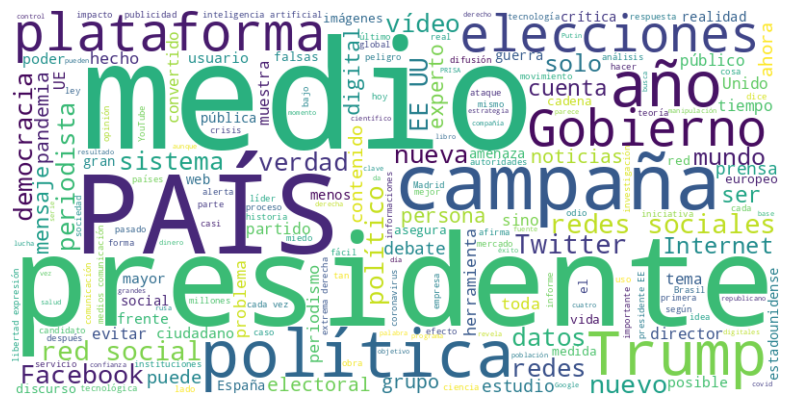

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Descargar las stopwords si no están descargadas previamente
nltk.download('stopwords')
nltk.download('punkt')

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Convierte los valores de la columna "Descripción" a cadenas (str)
df['Descripción'] = df['Descripción'].astype(str)

# Concatena todas las descripciones en un solo texto
descriptions_text = ' '.join(df['Descripción'])

# Reemplaza las frases que deseas eliminar con una cadena vacía o un marcador
phrases_to_remove = ["fake news", "noticias falsas"]
for phrase in phrases_to_remove:
    descriptions_text = descriptions_text.replace(phrase, "")

# Tokeniza el texto (divide el texto en palabras individuales)
tokens = word_tokenize(descriptions_text)

# Crea un conjunto de stopwords en español
spanish_stopwords = set(stopwords.words('spanish'))

# Agrega las palabras adicionales que deseas excluir
additional_stopwords = ["bulo", "mentira", "noticias falsas", "sido", "noticia", "falsos", "informacion", "información", "nan",
                        "maldita", "dos", "tres",
                        "desinformación", "mentiras", "falsa", "tras", "cómo", "si", "hace", "falso", "bulos"]
spanish_stopwords.update(additional_stopwords)

# Asegúrate de que el texto está en minúsculas para que la búsqueda y reemplazo no sea sensible a mayúsculas/minúsculas
descriptions_text = descriptions_text.lower()


# Filtra las stopwords del conjunto de tokens
filtered_tokens = [word for word in tokens if word.lower() not in spanish_stopwords]

# Une las palabras filtradas en un solo texto
filtered_text = ' '.join(filtered_tokens)

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
pip install tabulate


### Recuento de palabras

Se imprimirá las 10 palabras más relevantes junto con su frecuencia en las descripciones de las noticias falsas. Las stopwords han sido eliminadas y solo se incluyen las palabras más significativas. Si se desea obtener más palabras, se puede cambiar el valor de most_common() en word_count.most_common(10) a la cantidad deseada.

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from tabulate import tabulate

# Descargar las stopwords si no están descargadas previamente
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Convierte los valores de la columna "Descripción" a cadenas (str)
df['Descripción'] = df['Descripción'].astype(str)

# Concatena todas las descripciones en un solo texto
descriptions_text = ' '.join(df['Descripción'])

# Tokeniza el texto (divide el texto en palabras individuales)
tokens = word_tokenize(descriptions_text)

# Crea un conjunto de stopwords en español
spanish_stopwords = set(stopwords.words('spanish'))

# Filtra las stopwords y las palabras de una y dos letras del conjunto de tokens
filtered_tokens = [word for word in tokens if word.lower() not in spanish_stopwords and len(word) > 2]

# Realiza el recuento de las palabras
word_count = Counter(filtered_tokens)

# Obtiene las 10 palabras más relevantes junto con su frecuencia
most_common_words = word_count.most_common(30)

# Formatea la tabla de salida
table = [["Palabra", "Frecuencia"]] + [[word, count] for word, count in most_common_words]

# Muestra la tabla de salida con formato
print(tabulate(table, headers="firstrow", tablefmt="grid"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


+----------------+--------------+
| Palabra        |   Frecuencia |
+================+==============+
| noticias       |           79 |
+----------------+--------------+
| falsas         |           72 |
+----------------+--------------+
| desinformación |           60 |
+----------------+--------------+
| redes          |           58 |
+----------------+--------------+
| presidente     |           52 |
+----------------+--------------+
| medios         |           46 |
+----------------+--------------+
| información    |           45 |
+----------------+--------------+
| social         |           45 |
+----------------+--------------+
| red            |           44 |
+----------------+--------------+
| Trump          |           43 |
+----------------+--------------+
| news           |           38 |
+----------------+--------------+
| sociales       |           36 |
+----------------+--------------+
| nan            |           34 |
+----------------+--------------+
| elecciones  

#### Gráfico de barras de palabras más frecuentes

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


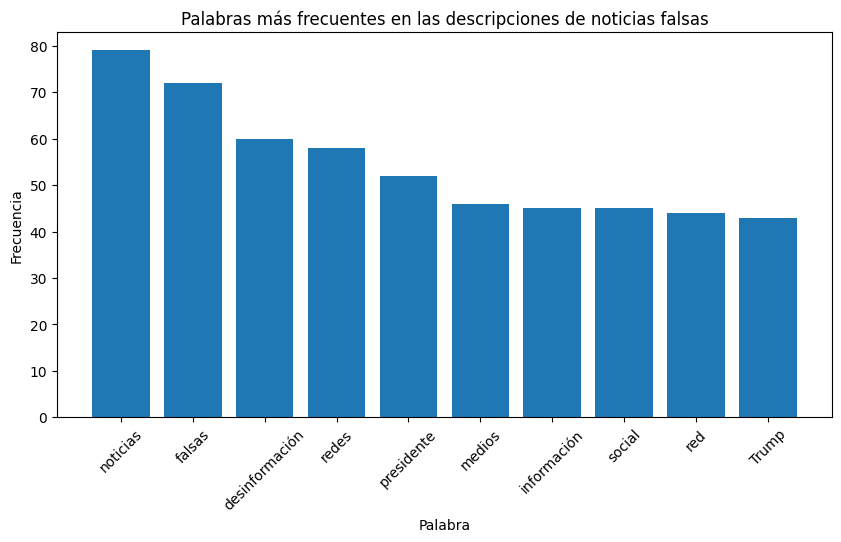

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Descargar las stopwords si no están descargadas previamente
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Convierte los valores de la columna "Descripción" a cadenas (str)
df['Descripción'] = df['Descripción'].astype(str)

# Concatena todas las descripciones en un solo texto
descriptions_text = ' '.join(df['Descripción'])

# Tokeniza el texto (divide el texto en palabras individuales)
tokens = word_tokenize(descriptions_text)

# Crea un conjunto de stopwords en español
spanish_stopwords = set(stopwords.words('spanish'))

# Filtra las stopwords y las palabras de una y dos letras del conjunto de tokens
filtered_tokens = [word for word in tokens if word.lower() not in spanish_stopwords and len(word) > 2]

# Realiza el recuento de las palabras
word_count = Counter(filtered_tokens)

# Obtén las 10 palabras más relevantes junto con su frecuencia
most_common_words = word_count.most_common(10)

# Gráfico de barras para las palabras más frecuentes
plt.figure(figsize=(10, 5))
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en las descripciones de noticias falsas')
plt.xticks(rotation=45)
plt.show()


### Evolución de palabras

En este código, utilizamos el índice del DataFrame como la variable de tiempo para representar la evolución del número de palabras. Cada punto en el eje x representa la posición de una noticia en el DataFrame, y el eje y muestra el número de palabras en cada descripción. El gráfico de línea resultante será más sencillo y visual sin el uso de formatos de fecha.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


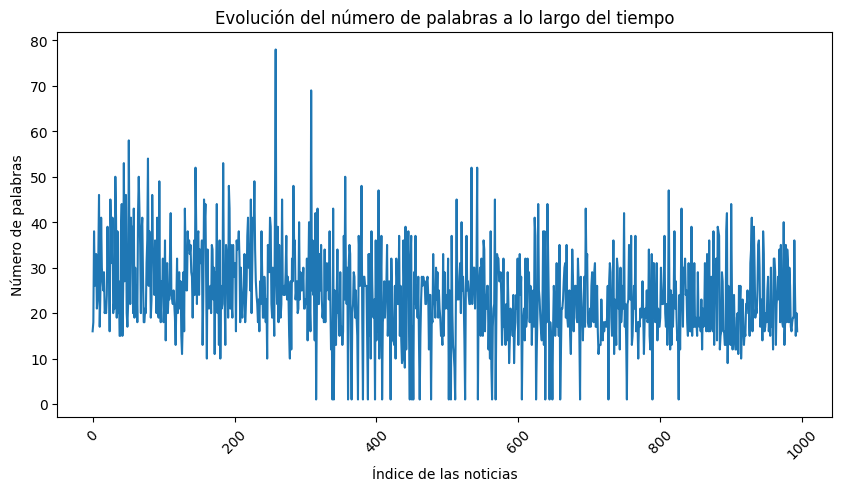

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Descargar las stopwords si no están descargadas previamente
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Convierte los valores de la columna "Descripción" a cadenas (str)
df['Descripción'] = df['Descripción'].astype(str)

# Concatena todas las descripciones en un solo texto
descriptions_text = ' '.join(df['Descripción'])

# Tokeniza el texto (divide el texto en palabras individuales)
tokens = word_tokenize(descriptions_text)

# Crea un conjunto de stopwords en español
spanish_stopwords = set(stopwords.words('spanish'))

# Filtra las stopwords y las palabras de una y dos letras del conjunto de tokens
filtered_tokens = [word for word in tokens if word.lower() not in spanish_stopwords and len(word) > 2]

# Realiza el recuento de las palabras
word_count = Counter(filtered_tokens)

# Obtén las 10 palabras más relevantes junto con su frecuencia
most_common_words = word_count.most_common(10)

# Crea una columna "Número de palabras" que contenga el número de palabras en cada descripción
df['Número de palabras'] = df['Descripción'].apply(lambda x: len(word_tokenize(x)))

# Gráfico de línea para la evolución del número de palabras a lo largo del tiempo
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Número de palabras'])
plt.xlabel('Índice de las noticias')
plt.ylabel('Número de palabras')
plt.title('Evolución del número de palabras a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()


### Análisis de sentimiento

Para realizar el análisis de sentimiento de las noticias falsas, se utilizó la biblioteca TextBlob en Python. Se procesaron las descripciones de las noticias y se calculó la polaridad de sentimiento para cada una de ellas. La polaridad representa la actitud o emoción expresada en el texto, clasificándolo como positivo, negativo o neutro. Luego, se agregaron las polaridades de sentimiento al DataFrame y se creó una nueva columna que clasifica el sentimiento en cada noticia. Con esta información, se generó una tabla que muestra la clasificación de sentimiento para cada noticia falsa, permitiendo visualizar rápidamente si el contenido es percibido como positivo, negativo o neutro. Además, se creó un gráfico de barras que ilustra la distribución del sentimiento en las noticias, proporcionando una visión general de la tendencia de los sentimientos expresados en las noticias falsas recopiladas. Es importante mencionar que TextBlob es una herramienta sencilla y su precisión puede variar según el contexto y el idioma, por lo que para análisis más avanzados y precisos, podrían considerarse modelos especializados como Transformers con BERT o GPT-3.

In [ ]:
from textblob import TextBlob

# Procesar las descripciones de las noticias falsas
descriptions = df['Descripción'].astype(str)

# Realizar el análisis de sentimiento para cada descripción
sentiments = [TextBlob(description).sentiment.polarity for description in descriptions]

# Agregar la columna de sentimientos al DataFrame
df['Sentimiento'] = sentiments

# Clasificar el sentimiento como positivo, negativo o neutro
df['Clasificación de Sentimiento'] = df['Sentimiento'].apply(lambda score: 'Positivo' if score > 0 else ('Negativo' if score < 0 else 'Neutro'))


In [ ]:
df.head()

,Categoría,Título,Autor,Fecha de publicación,Descripción,Enlace,Número de palabras,Sentimiento,Clasificación de Sentimiento
0,Columna,Palabras que nunca tienen consecuencias,Lluís Bassets,13 ago 2023 - 05:00 CEST,Donald Trump busca cobijo en la libertad de ex...,https://elpais.com/opinion/2023-08-13/palabras...,16,0.0,Neutro
1,Pamplinas,La palabra periodismo,Martín Caparrós,12 ago 2023 - 05:00 CEST,Ahora la información llega en cualquier moment...,https://elpais.com/eps/2023-08-12/la-palabra-p...,18,0.0,Neutro
2,Bulos internet,El día que Twitter mató a Savater y Perales y ...,Clara Angela Brascia,08 ago 2023 - 13:19 CEST,Con la agenda informativa de verano a medio ga...,https://elpais.com/tecnologia/2023-08-08/el-di...,38,0.0,Neutro
3,Elecciones EE UU,DeSantis reconoce que Biden ganó las eleccione...,Macarena Vidal Liy,07 ago 2023 - 22:40 CEST,El candidato republicano se pronuncia por prim...,https://elpais.com/internacional/2023-08-07/de...,26,0.0,Neutro
4,Columna,Un vasto programa,Bernat Castany Prado,07 ago 2023 - 05:00 CEST,Hay que aprender a someter la opinión personal...,https://elpais.com/opinion/2023-08-07/un-vasto...,29,0.0,Neutro


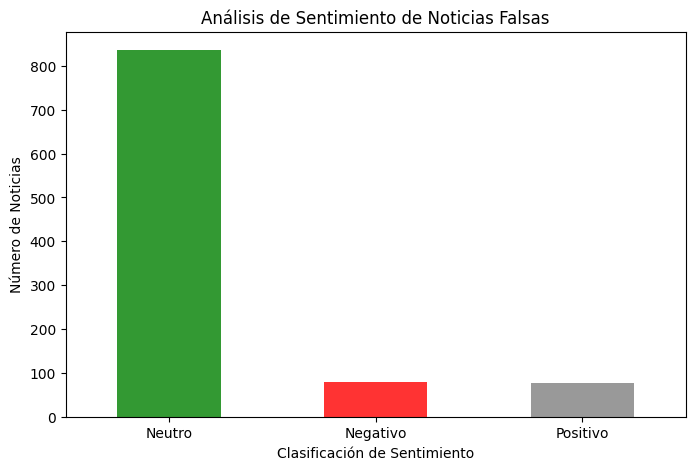

                                                Título  \
0              Palabras que nunca tienen consecuencias   
1                                La palabra periodismo   
2    El día que Twitter mató a Savater y Perales y ...   
3    DeSantis reconoce que Biden ganó las eleccione...   
4                                    Un vasto programa   
..                                                 ...   
989                   Amenazas a la libertad de prensa   
990  Los ultras europeos exhiben unidad en su gran ...   
991  Trump manda callar a un periodista de la CNN y...   
992  La mayoría de los estadounidenses se cree las ...   
993  Facebook y Google declaran la guerra a las web...   

    Clasificación de Sentimiento  
0                         Neutro  
1                         Neutro  
2                         Neutro  
3                         Neutro  
4                         Neutro  
..                           ...  
989                       Neutro  
990                    

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Procesar las descripciones de las noticias falsas
descriptions = df['Descripción'].astype(str)

# Realizar el análisis de sentimiento para cada descripción
sentiments = [TextBlob(description).sentiment.polarity for description in descriptions]

# Agregar la columna de sentimientos al DataFrame
df['Sentimiento'] = sentiments

# Clasificar el sentimiento como positivo, negativo o neutro
df['Clasificación de Sentimiento'] = df['Sentimiento'].apply(lambda score: 'Positivo' if score > 0 else ('Negativo' if score < 0 else 'Neutro'))

# Crear una tabla que muestra la clasificación de sentimiento de cada noticia
tabla_sentimiento = df[['Título', 'Clasificación de Sentimiento']]

# Crear un gráfico de barras para visualizar la distribución del sentimiento
sentimiento_counts = df['Clasificación de Sentimiento'].value_counts()
plt.figure(figsize=(8, 5))
sentimiento_counts.plot(kind='bar', color=['green', 'red', 'gray'], alpha=0.8)
plt.xlabel('Clasificación de Sentimiento')
plt.ylabel('Número de Noticias')
plt.title('Análisis de Sentimiento de Noticias Falsas')
plt.xticks(rotation=0)
plt.show()

# Mostrar la tabla con la clasificación de sentimiento
print(tabla_sentimiento)


## 3. Visualization

### Histogramas

El primer gráfico, un histograma de la longitud de las descripciones de las noticias falsas, permite visualizar cómo se distribuyen las longitudes de los textos en las noticias. En el eje x se representa la longitud de las descripciones, mientras que el eje y muestra la frecuencia de las noticias con una determinada cantidad de palabras. Este gráfico ofrece una rápida comprensión de la cantidad de información que se presenta en cada noticia, mostrando cuántas noticias tienen una longitud corta, cuántas son más extensas y si existe alguna tendencia o concentración en una longitud específica.

Por otro lado, el segundo gráfico, un histograma de la distribución de categorías de las noticias falsas, proporciona una visión general de las categorías más comunes en el conjunto de datos. Cada barra del gráfico representa una categoría de noticia, y la altura de la barra muestra cuántas noticias pertenecen a esa categoría. Al mostrar las 20 categorías más repetidas, este gráfico permite identificar fácilmente las temáticas principales y las áreas de enfoque más frecuentes en las noticias falsas recopiladas del periódico "El País". Con esta representación, los analistas pueden entender rápidamente las áreas de interés predominantes en las noticias falsas y enfocar mejor sus investigaciones y análisis.

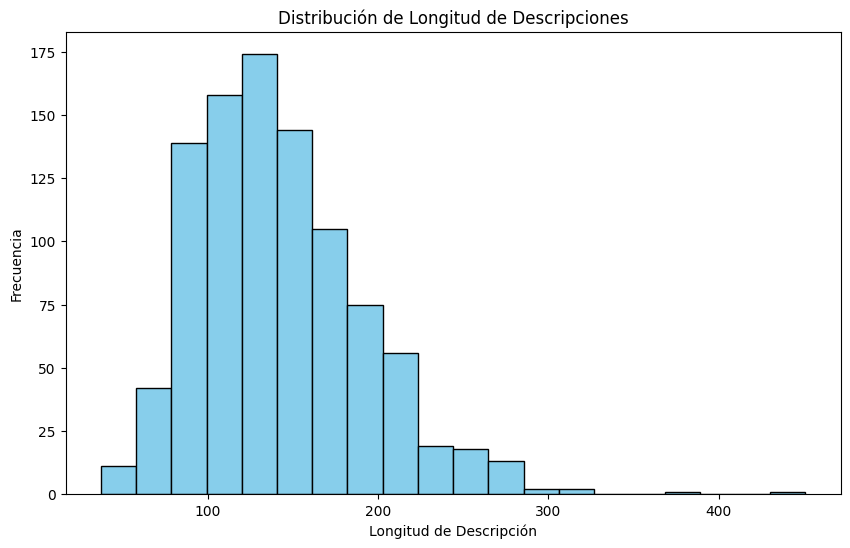

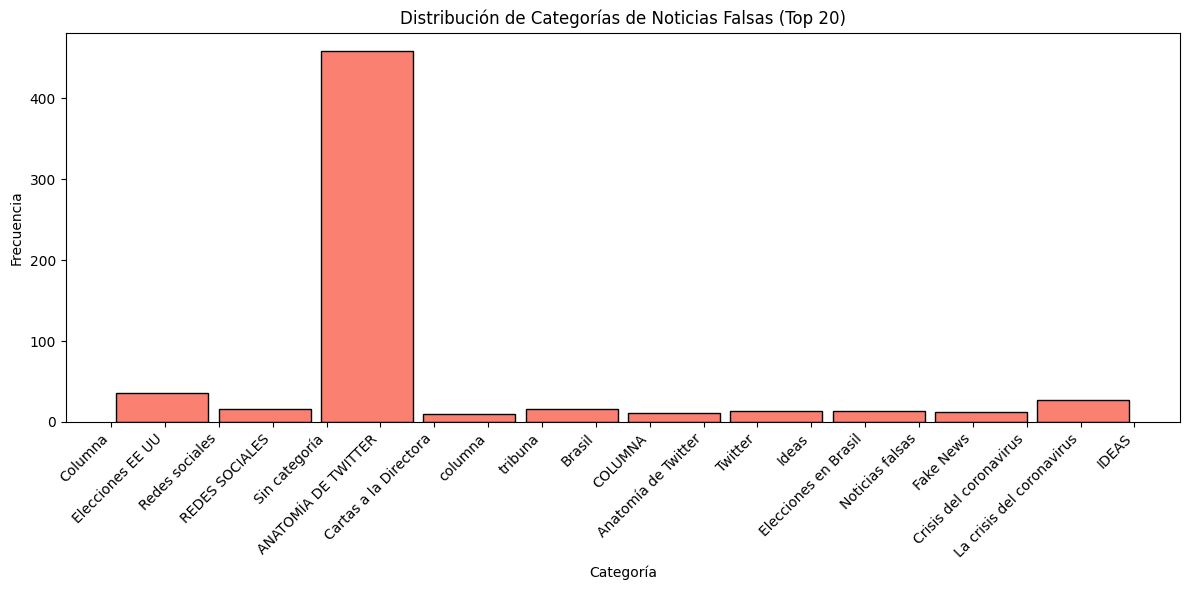

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Histograma de la longitud de las descripciones de las noticias falsas
plt.figure(figsize=(10, 6))
plt.hist(df['Descripción'].str.len(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Longitud de Descripción')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud de Descripciones')
plt.show()

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Obtener las 20 categorías más comunes
top_categories = df['Categoría'].value_counts().nlargest(20).index

# Filtrar el DataFrame para incluir solo las noticias de las categorías más comunes
df_top_categories = df[df['Categoría'].isin(top_categories)]

# Histograma de la distribución de las categorías de las noticias falsas más comunes
plt.figure(figsize=(12, 6))
plt.hist(df_top_categories['Categoría'], color='salmon', edgecolor='black', rwidth=0.9)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías de Noticias Falsas (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [ ]:
# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Calcula la frecuencia de cada categoría
frequencies = df['Categoría'].value_counts()

# Obtén las 10 categorías más repetidas y sus frecuencias
top_10_categories = frequencies.nlargest(10)

print("Las 10 categorías más repetidas son:")
for category, frequency in top_10_categories.items():
    print(f'"{category}" con {frequency} noticias.')


Las 10 categorías más repetidas son:
"Sin categoría" con 449 noticias.
"Columna" con 31 noticias.
"La crisis del coronavirus" con 20 noticias.
"Redes sociales" con 10 noticias.
"tribuna" con 10 noticias.
"ANATOMÍA DE TWITTER" con 9 noticias.
"Ideas" con 8 noticias.
"Fake News" con 7 noticias.
"IDEAS" con 7 noticias.
"Elecciones en Brasil" con 7 noticias.


### Gráfico de barras

El gráfico de barras muestra las 10 categorías más comunes de noticias falsas recopiladas del periódico "El País". Cada barra representa una categoría y su altura indica la frecuencia de noticias pertenecientes a esa categoría. Las categorías se etiquetan en el eje x para facilitar la identificación y comprensión. Se han utilizado colores atractivos y etiquetas en negrita para enfatizar las categorías y mejorar la legibilidad del gráfico.

Además, el gráfico incluye una línea de tendencia (en gris) que muestra la media de frecuencia de las categorías más comunes, lo que proporciona una referencia visual para entender el nivel promedio de frecuencia en el conjunto de datos. También se agrega una línea discontinua (en rojo) que destaca la frecuencia promedio de todas las categorías, permitiendo comparar fácilmente las frecuencias individuales con el valor promedio.

En conjunto, el gráfico de barras ofrece una representación completa y visualmente atractiva de las categorías más comunes de noticias falsas, permitiendo identificar rápidamente las áreas de enfoque predominantes y proporcionando información adicional con las líneas de tendencia y referencia. Es una herramienta efectiva para comprender y analizar la distribución de las categorías en el conjunto de datos de noticias falsas del periódico "El País".

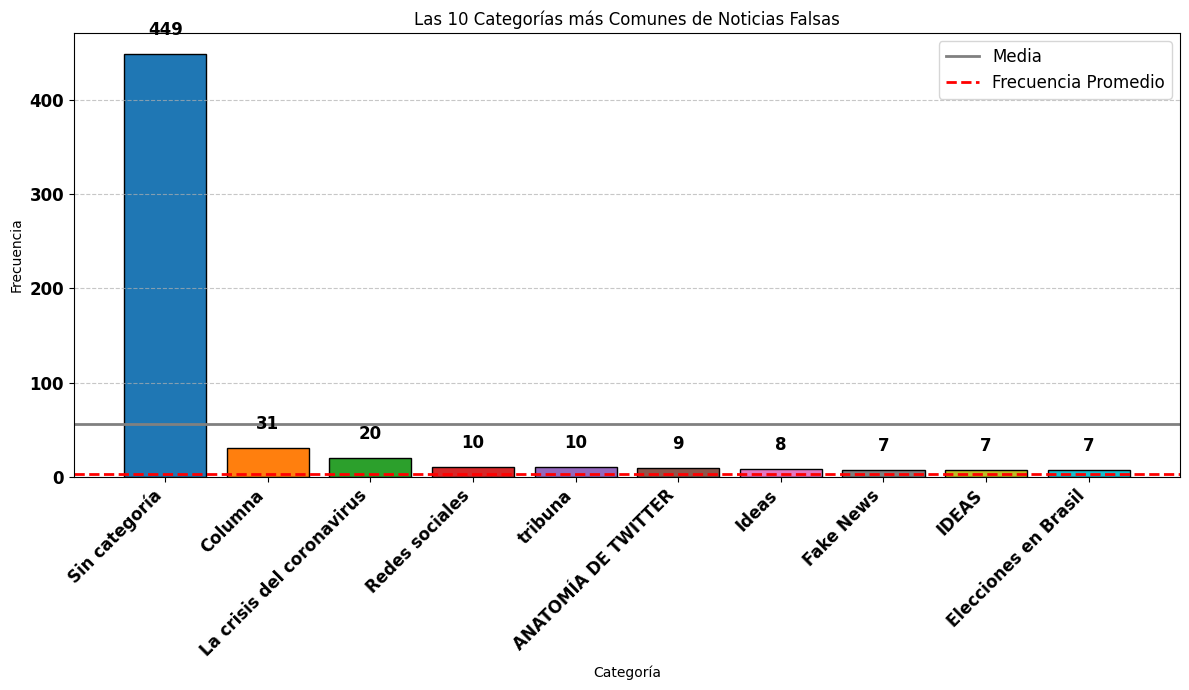

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Obtén las 10 categorías más comunes
top_10_categories = df['Categoría'].value_counts().nlargest(10)

# Configuración de colores personalizados para las barras
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
plt.bar(top_10_categories.index, top_10_categories.values, color=colors, edgecolor='black')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Las 10 Categorías más Comunes de Noticias Falsas')
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Agregar etiquetas sobre las barras con la frecuencia de cada categoría
for i, value in enumerate(top_10_categories.values):
    plt.text(i, value + 20, str(value), ha='center', fontsize=12, fontweight='bold')

# Calcular la línea de tendencia (media de frecuencia)
mean_frequency = top_10_categories.values.mean()
plt.axhline(mean_frequency, color='gray', linestyle='-', label='Media', linewidth=2)

# Agregar una línea discontinua para destacar la frecuencia promedio
plt.axhline(df['Categoría'].value_counts().mean(), color='red', linestyle='--', label='Frecuencia Promedio', linewidth=2)

plt.legend(fontsize=12)

plt.show()


### Gráficos de líneas

El gráfico de líneas que muestra la cantidad de noticias falsas por categoría representa visualmente la distribución de noticias falsas en las 20 categorías más importantes. Cada punto en el gráfico representa una categoría y su posición en el eje y indica la cantidad de noticias falsas asociadas con esa categoría. Se utilizan círculos marcadores para resaltar los valores de cada categoría, y se han agregado etiquetas con el número exacto de noticias falsas en cada punto para proporcionar información adicional. Además, el gráfico incluye una línea horizontal punteada de color naranja que indica el promedio de noticias falsas por categoría, lo que permite comparar visualmente la cantidad de noticias falsas en cada categoría con el promedio general.

El gráfico de líneas (el segundo) que muestra la cantidad de noticias falsas por autor es una visualización que destaca la contribución de cada autor a la generación de noticias falsas. Cada punto en el gráfico representa un autor y su posición en el eje y indica la cantidad de noticias falsas asociadas con ese autor. El gráfico utiliza círculos marcadores para enfatizar los valores de cada autor, y se han añadido etiquetas con la cantidad exacta de noticias falsas generadas por cada autor. Esta visualización ayuda a identificar rápidamente los autores que han producido la mayor cantidad de noticias falsas y permite detectar posibles patrones o tendencias en la generación de contenido falso.

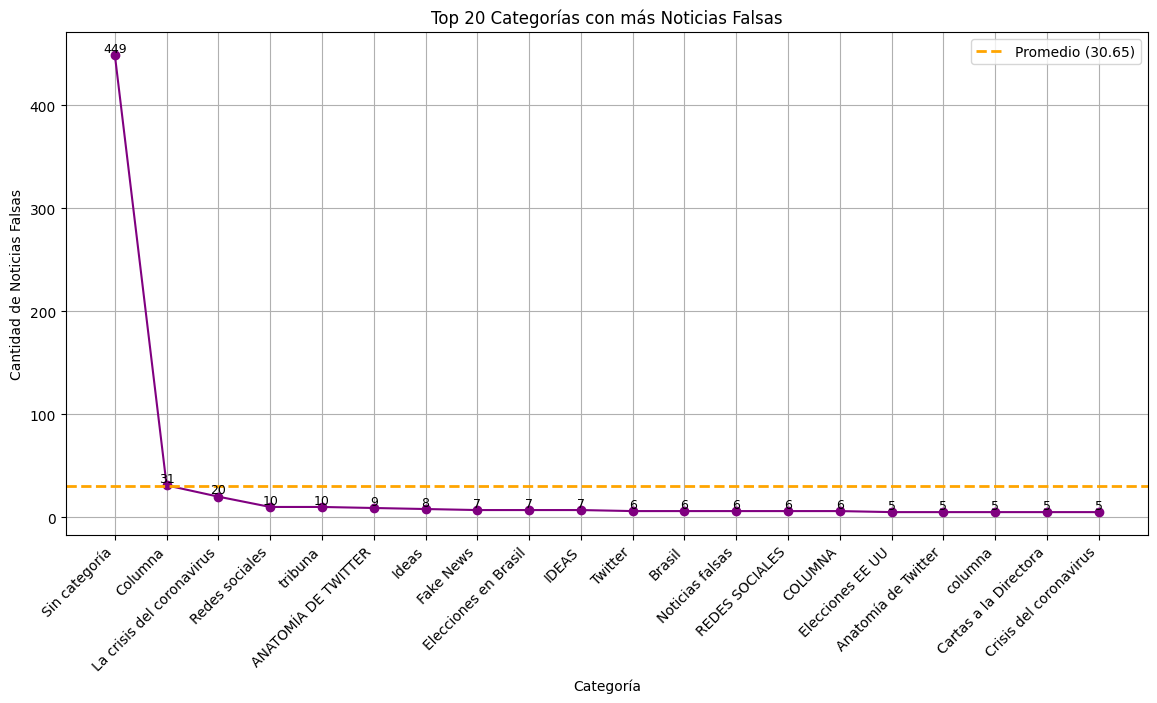

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Obtener las 20 categorías más importantes
top_categories = df['Categoría'].value_counts().head(20)

# Filtrar el DataFrame solo para las categorías más importantes
df_top_categories = df[df['Categoría'].isin(top_categories.index)]

# Contar la cantidad de noticias falsas por categoría
news_per_category = df_top_categories['Categoría'].value_counts()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(news_per_category.index, news_per_category, marker='o', color='purple')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Noticias Falsas')
plt.title('Top 20 Categorías con más Noticias Falsas')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas a los puntos de datos
for x, y in zip(news_per_category.index, news_per_category):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=9)

# Agregar una línea horizontal que indica el promedio de noticias por categoría
average_news_per_category = news_per_category.mean()
plt.axhline(y=average_news_per_category, color='orange', linestyle='--', linewidth=2,
            label='Promedio ({:.2f})'.format(average_news_per_category))
plt.legend()

plt.show()




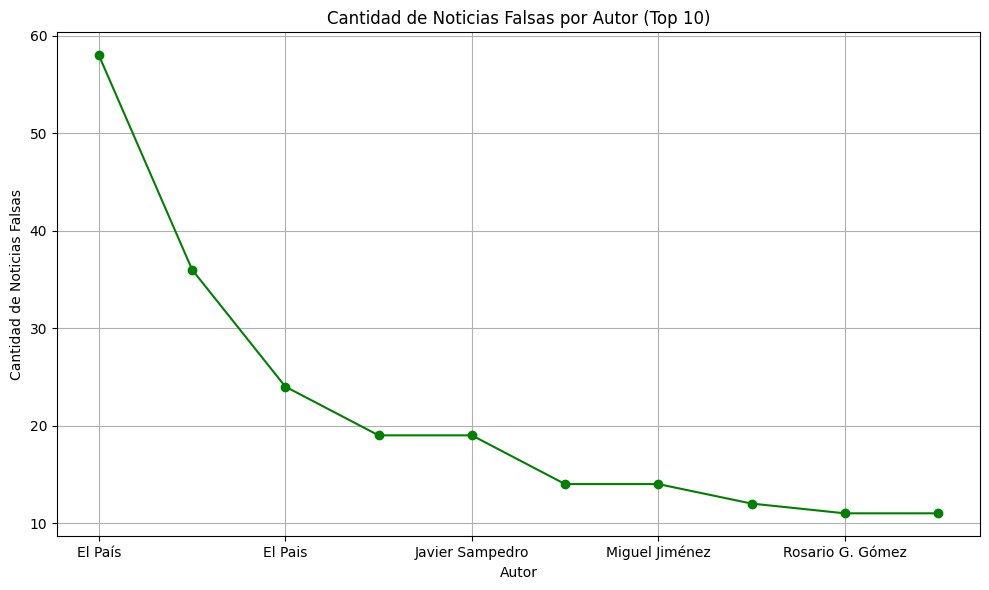

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Contar la cantidad de noticias falsas por autor
news_per_author = df['Autor'].value_counts().head(10)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
news_per_author.plot(kind='line', marker='o', color='g')
plt.xlabel('Autor')
plt.ylabel('Cantidad de Noticias Falsas')
plt.title('Cantidad de Noticias Falsas por Autor (Top 10)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Gráficos circulares

El primer gráfico circular muestra la distribución de noticias falsas por categoría, destacando las 10 categorías más importantes. Cada segmento del gráfico representa una categoría, y el tamaño del segmento corresponde a la proporción de noticias falsas en esa categoría. Las etiquetas en cada segmento muestran el porcentaje de noticias falsas para esa categoría, lo que permite una fácil comprensión de la distribución relativa de noticias falsas en las categorías principales. Además, el gráfico incluye una categoría general "Otros" que agrupa las categorías menos numerosas, lo que ayuda a mantener el gráfico limpio y evita la saturación de etiquetas. Este gráfico circular es llamativo y visualmente atractivo debido a la selección de colores y la inclusión del círculo blanco con sombra.

El segundo gráfico circular muestra la distribución de noticias falsas por autor, enfocándose en los 10 autores más importantes. Cada segmento del gráfico representa un autor y su tamaño indica la proporción de noticias falsas asociadas con ese autor. Al igual que en el primer gráfico, las etiquetas muestran el porcentaje de noticias falsas para cada autor, lo que facilita la identificación rápida de los autores más destacados en la generación de contenido falso. El gráfico también incluye la categoría general "Otros", que agrupa a los autores menos numerosos, manteniendo el gráfico limpio y fácil de interpretar. El uso de colores llamativos y la inclusión del círculo blanco con sombra realzan la presentación visual de este gráfico circular, haciendo que la distribución de noticias falsas por autor sea más comprensible y atractiva.

<ipython-input-24-9763f8a0cf77>:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news_per_category = top_categories.append(other_categories)


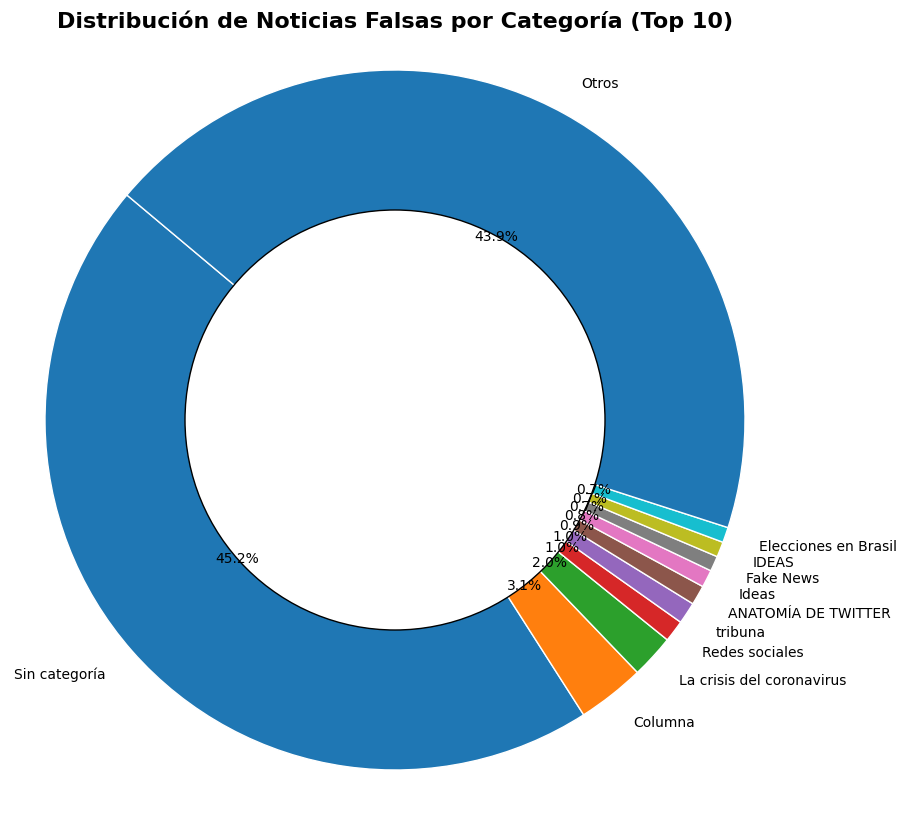

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Contar la cantidad de noticias falsas por categoría
news_per_category = df['Categoría'].value_counts()

# Obtener las 10 categorías más importantes y agrupar el resto en "Otros"
top_categories = news_per_category.nlargest(10)
other_categories = pd.Series(news_per_category.loc[~news_per_category.index.isin(top_categories.index)].sum(),
                             index=['Otros'])
news_per_category = top_categories.append(other_categories)

# Configurar colores para el gráfico
colors = plt.cm.tab10.colors

# Crear el gráfico circular
plt.figure(figsize=(10, 10))
plt.pie(news_per_category, labels=news_per_category.index, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(edgecolor='white'))

# Agregar título y sombra
plt.title('Distribución de Noticias Falsas por Categoría (Top 10)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().add_patch(plt.Circle((0, 0), 0.6, fc='white', ec='black', zorder=1))

plt.show()





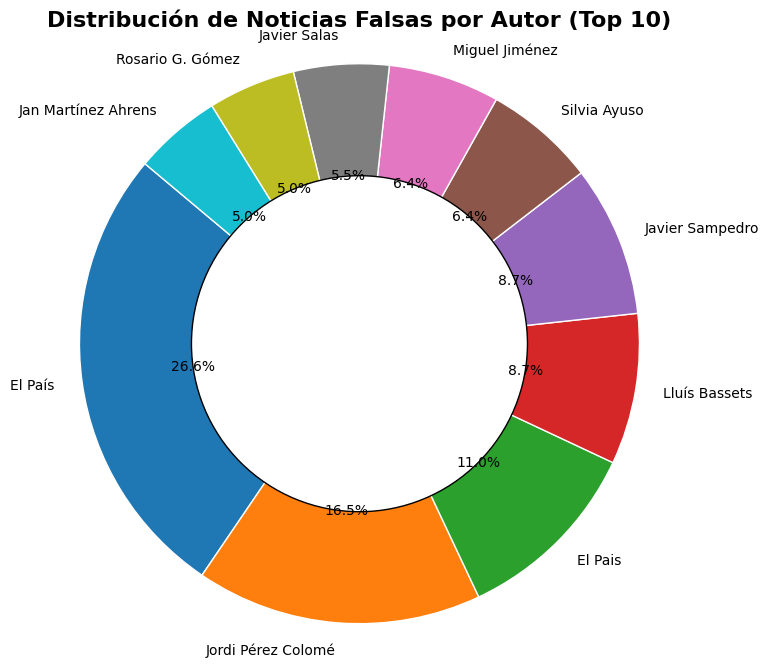

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Contar la cantidad de noticias falsas por autor
news_per_author = df['Autor'].value_counts().head(10)

# Configurar colores para el gráfico
colors = plt.cm.tab10.colors

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(news_per_author, labels=news_per_author.index, colors=colors, autopct='%1.1f%%', startangle=140,
        wedgeprops=dict(edgecolor='white'))

# Agregar título y sombra
plt.title('Distribución de Noticias Falsas por Autor (Top 10)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().add_patch(plt.Circle((0, 0), 0.6, fc='white', ec='black', zorder=1))

plt.show()


### Tabla

En la tabla se muestran las noticias falsas más interesantes agrupadas por las categorías con mayor cantidad de noticias. Para ello, primero se calcula la cantidad de noticias falsas por cada categoría y se seleccionan las cinco categorías con mayor número de noticias. Luego, el DataFrame se filtra para mostrar solo las noticias falsas asociadas a esas categorías principales.

La tabla resultante presenta una lista organizada de noticias falsas, donde cada fila representa una noticia y muestra su título, categoría y autor. Al agrupar las noticias por categorías más numerosas, se proporciona una visión rápida y concisa de las noticias falsas más relevantes en cada una de las categorías más destacadas. Esto permite a los lectores obtener una comprensión clara de las áreas temáticas donde se generan más noticias falsas y conocer los títulos y autores más destacados en cada categoría. El formato de la tabla es legible y fácil de analizar, lo que facilita la identificación de las noticias más interesantes dentro de cada categoría clave.

In [ ]:
import pandas as pd
from tabulate import tabulate

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Calcular la cantidad de noticias falsas por categoría y seleccionar las categorías con más noticias
top_categories = df['Categoría'].value_counts().nlargest(5).index

# Filtrar el DataFrame para mostrar solo las noticias falsas de las categorías más numerosas
interesting_rows = df[df['Categoría'].isin(top_categories)]

# Seleccionar las columnas de interés
selected_columns = ['Título', 'Categoría', 'Autor']

# Muestra la tabla de noticias falsas más interesantes por categoría
print(tabulate(interesting_rows[selected_columns], headers='keys', tablefmt='fancy_grid'))


╒═════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════╤═════════════════════════════════════════════════════════╕
│     │ Título                                                                                                                   │ Categoría                 │ Autor                                                   │
╞═════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════════════════╪═════════════════════════════════════════════════════════╡
│   0 │ Palabras que nunca tienen consecuencias                                                                                  │ Columna                   │ Lluís Bassets                                           │
├─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼──

### Gráfico de dispersión

El gráfico de dispersión representa la relación entre el número de palabras en la descripción de las noticias falsas y su categoría, utilizando diferentes colores para distinguir los autores de las noticias. En el eje horizontal, se encuentra el número de palabras en la descripción, mientras que en el eje vertical se encuentran las diferentes categorías. Cada punto en el gráfico representa una noticia falsa, y su posición en los ejes indica el número de palabras en la descripción y la categoría a la que pertenece.

Los puntos están agrupados en diferentes categorías, lo que permite visualizar la distribución de las noticias falsas en función del número de palabras en sus descripciones y su temática. Además, cada punto está coloreado según el autor de la noticia, lo que permite identificar patrones de autoría dentro de cada categoría. El tamaño de los puntos también está relacionado con el número de palabras en la descripción, de modo que los puntos más grandes representan noticias con descripciones más largas.

Este gráfico nos proporciona una visión general de cómo se distribuyen las noticias falsas en función de la longitud de sus descripciones y su categoría, y también permite identificar patrones de autoría en las noticias más comunes. La visualización es útil para identificar tendencias y patrones en los datos y puede proporcionar información importante para el análisis de noticias falsas.

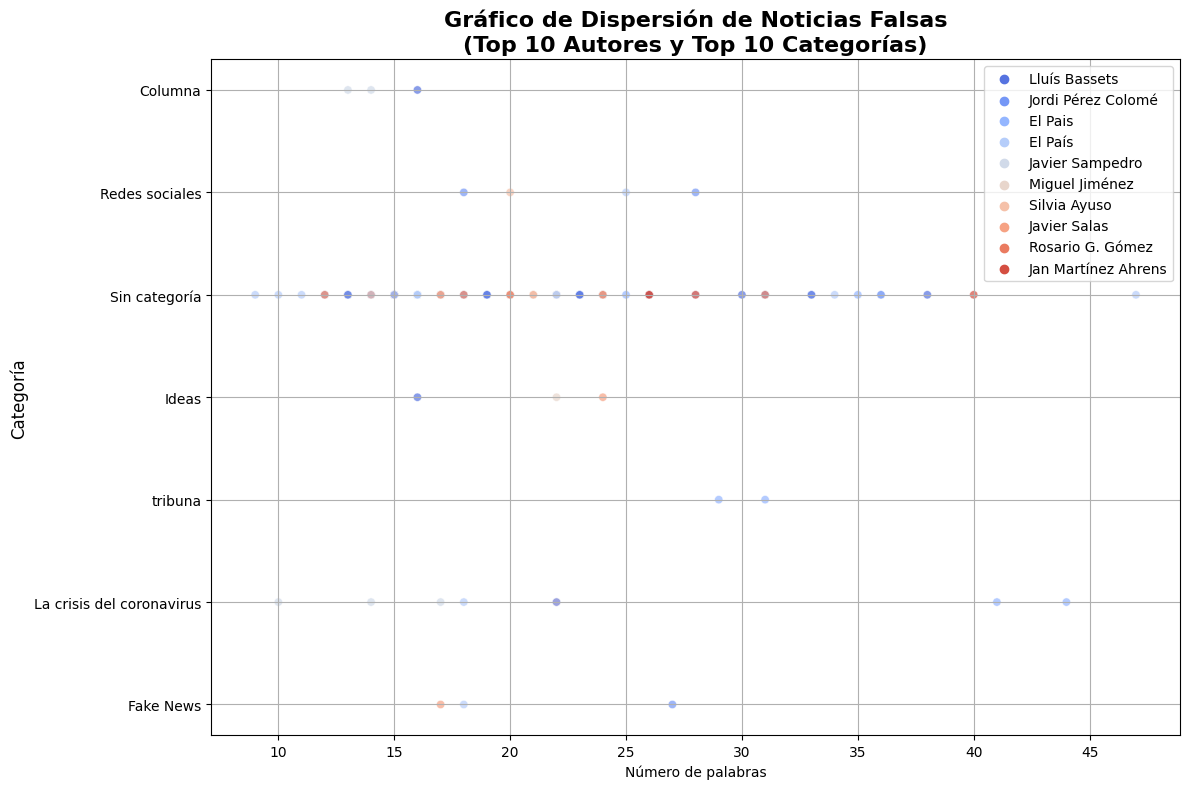

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Eliminar filas con valores nulos en la columna 'Descripción'
df.dropna(subset=['Descripción'], inplace=True)

# Obtener los 10 autores y 10 categorías más frecuentes
top_10_authors = df['Autor'].value_counts().nlargest(10).index
top_10_categories = df['Categoría'].value_counts().nlargest(10).index

# Filtrar el DataFrame original para mantener solo las filas correspondientes a los 10 autores y 10 categorías más frecuentes
filtered_df = df[df['Autor'].isin(top_10_authors) & df['Categoría'].isin(top_10_categories)].copy()

# Eliminar los autores que contienen un número en su nombre
filtered_df = filtered_df[~filtered_df['Autor'].str.isnumeric()]

# Crear la columna 'Número de palabras' contando el número de palabras en cada descripción
filtered_df['Número de palabras'] = filtered_df['Descripción'].str.split().apply(len)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_df,
    x='Número de palabras',
    y='Categoría',
    hue='Autor',
    palette='coolwarm',
    alpha=0.7,
    legend='brief'  # Eliminar la leyenda del número de palabras
)

# Personalizar el gráfico
plt.ylabel('Categoría', fontsize=12)
plt.title('Gráfico de Dispersión de Noticias Falsas\n(Top 10 Autores y Top 10 Categorías)', fontsize=16, fontweight='bold')
plt.grid(True)

# Formatear los nombres de los autores en la leyenda
plt.legend(title='Autor', fontsize=10, title_fontsize=12, loc='upper right')
for t in plt.legend().get_texts():
    t.set_text(t.get_text().split(':')[0])
plt.tight_layout()

# Mostrar el gráfico
plt.show()



### Array de gráficos

El primer gráfico de barras en la parte superior izquierda muestra la cantidad de noticias por categoría, donde cada barra representa una categoría y su altura indica la cantidad de noticias asociadas a esa categoría.

El segundo gráfico de barras en la parte superior derecha muestra la cantidad de noticias por autor, donde cada barra representa un autor y su altura indica la cantidad de noticias asociadas a ese autor.

Los dos gráficos de pastel en la parte inferior representan el porcentaje de noticias por categoría y por autor. Cada sector del gráfico de pastel representa una categoría o un autor, y su tamaño relativo muestra el porcentaje de noticias correspondientes a esa categoría o autor con respecto al total de noticias.

Es importante tener en cuenta que el array de gráficos proporcionado no corresponde con el gráfico de barras anterior, ya que en el array se han filtrado los datos para mostrar solo las 10 categorías y los 10 autores con más noticias. Esto permite enfocarse en las categorías y autores más relevantes y visualizar de manera más clara la distribución de noticias en el dataset.

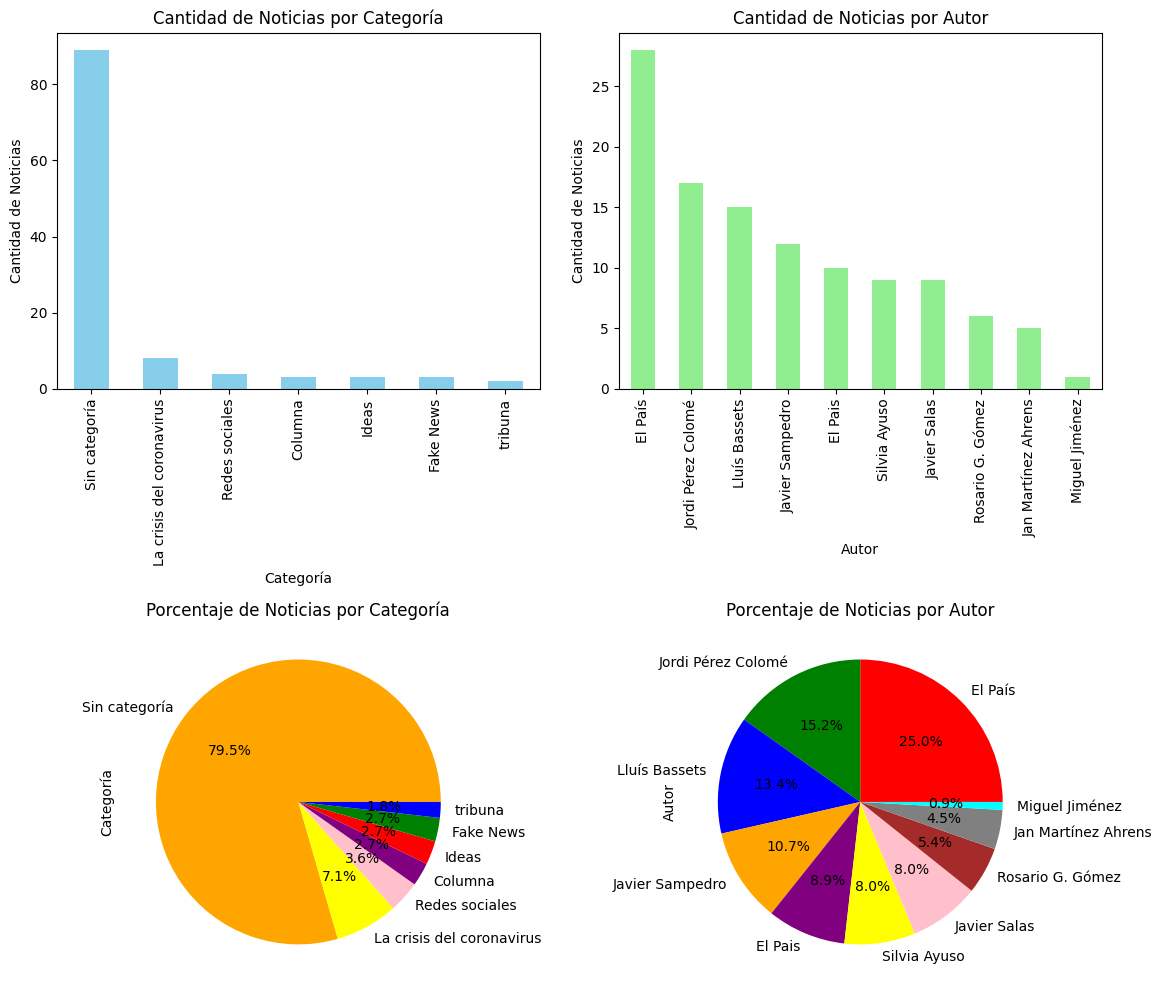

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Filtrar por los 10 autores y 10 categorías con más noticias
top_10_autores = df['Autor'].value_counts().head(10).index
top_10_categorias = df['Categoría'].value_counts().head(10).index
filtered_df = df[df['Autor'].isin(top_10_autores) & df['Categoría'].isin(top_10_categorias)]

# Crear un array de gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Gráfico 1: Cantidad de Noticias por Categoría (Gráfico de Barras)
filtered_df['Categoría'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Cantidad de Noticias por Categoría')
axes[0, 0].set_xlabel('Categoría')
axes[0, 0].set_ylabel('Cantidad de Noticias')

# Gráfico 2: Cantidad de Noticias por Autor (Gráfico de Barras)
filtered_df['Autor'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Cantidad de Noticias por Autor')
axes[0, 1].set_xlabel('Autor')
axes[0, 1].set_ylabel('Cantidad de Noticias')

# Gráfico 3: Porcentaje de Noticias por Categoría (Gráfico de Pastel)
filtered_df['Categoría'].value_counts().plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', colors=['orange', 'yellow', 'pink', 'purple', 'red', 'green', 'blue', 'brown', 'gray', 'cyan'])
axes[1, 0].set_title('Porcentaje de Noticias por Categoría')

# Gráfico 4: Porcentaje de Noticias por Autor (Gráfico de Pastel)
filtered_df['Autor'].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', colors=['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan'])
axes[1, 1].set_title('Porcentaje de Noticias por Autor')

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


### Box Plot

El box plot del número de noticias por categoría muestra la distribución del número de noticias que pertenecen a cada una de las 10 categorías con más noticias en el conjunto de datos de noticias falsas. Cada caja en el gráfico representa una categoría y muestra la mediana (la línea en el medio de la caja), los cuartiles (los bordes de la caja) y los posibles valores atípicos (los puntos fuera de los bigotes). La altura de cada caja representa la variabilidad del número de noticias en esa categoría. Este gráfico nos permite visualizar rápidamente cómo se distribuye el número de noticias en las categorías principales y detectar posibles valores atípicos o diferencias significativas entre ellas.

Por otro lado, el box plot del número de palabras en las descripciones muestra la distribución del número de palabras en las noticias falsas. Al igual que el box plot anterior, cada caja representa una categoría, pero en este caso, la variable representada es el número de palabras en las descripciones. La mediana, cuartiles y posibles valores atípicos nos dan una idea de la dispersión y la tendencia central del número de palabras en las descripciones de las noticias falsas. Este gráfico es útil para entender la longitud de las descripciones y si hay diferencias notables en la longitud de las noticias según su categoría.

En resumen, ambos box plots proporcionan una visualización efectiva para entender la distribución y la variabilidad de dos variables diferentes: el número de noticias por categoría y el número de palabras en las descripciones de las noticias.

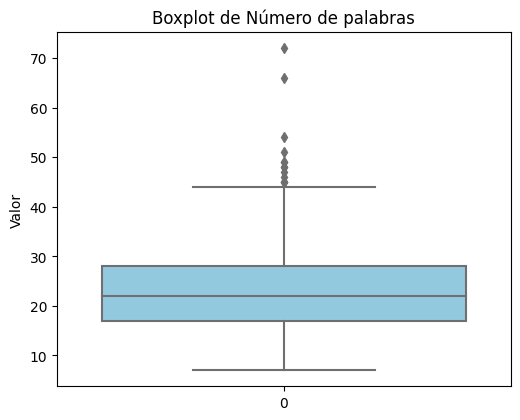

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos (reemplaza 'noticias_falsas_el_pais.csv' con el nombre de tu archivo)
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Eliminar filas con valores faltantes en la columna "Descripción"
df = df.dropna(subset=['Descripción'])

# Calcular la columna "Número de palabras" contando el número de palabras en cada descripción
df['Número de palabras'] = df['Descripción'].str.split().apply(len)

# Calcular las cuatro variables estadísticas
mean_words = df['Número de palabras'].mean()
median_words = df['Número de palabras'].median()
std_words = df['Número de palabras'].std()
iqr_words = df['Número de palabras'].quantile(0.75) - df['Número de palabras'].quantile(0.25)

# Crea los cuatro boxplots
plt.figure(figsize=(10, 8))

# Boxplot 1: Número de palabras
plt.subplot(2, 2, 1)
sns.boxplot(data=df['Número de palabras'], color='skyblue')
plt.title('Boxplot de Número de palabras')
plt.xlabel('')
plt.ylabel('Valor')

plt.tight_layout()
plt.show()



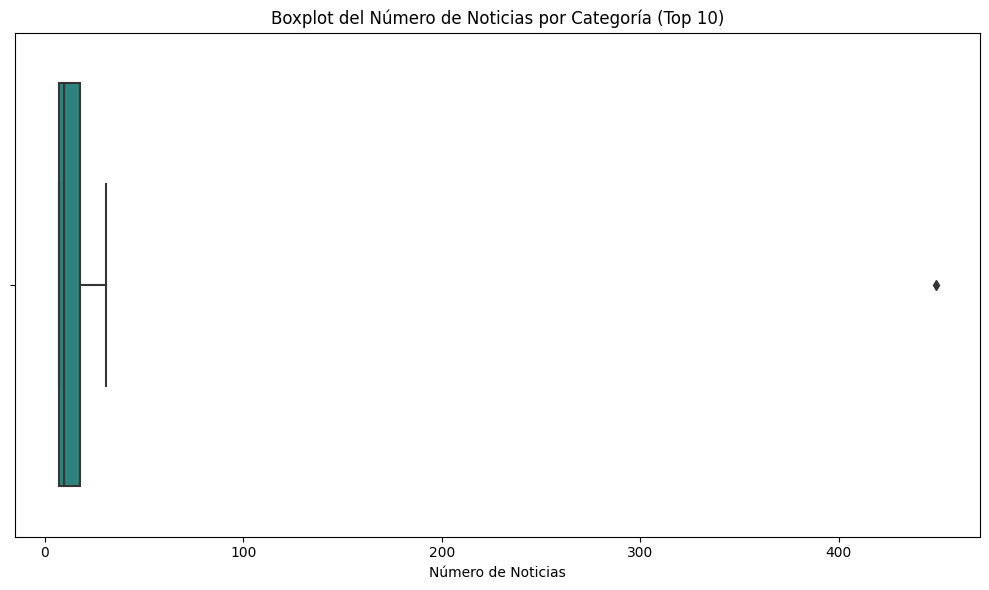

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos (reemplaza 'noticias_falsas_el_pais.csv' con el nombre de tu archivo)
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Cuenta la cantidad de noticias por categoría
categoria_counts = df['Categoría'].value_counts()

# Selecciona las 10 categorías con más noticias
top_10_categorias = categoria_counts.nlargest(10).index

# Filtra el DataFrame para incluir solo las noticias de las 10 categorías con más noticias
df_filtered = df[df['Categoría'].isin(top_10_categorias)]

# Calcular el número de noticias por categoría
numero_noticias_por_categoria = df_filtered['Categoría'].value_counts()

# Crear el gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=numero_noticias_por_categoria, palette='viridis')
plt.title('Boxplot del Número de Noticias por Categoría (Top 10)')
plt.xlabel('Número de Noticias')
plt.tight_layout()
plt.show()


### Otros histogramas

<ipython-input-31-2e9a0e83bf84>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(filtered_df['Categoría'].unique(), rotation=45, ha='right')
<ipython-input-31-2e9a0e83bf84>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(filtered_df['Autor'].unique(), rotation=45, ha='right')


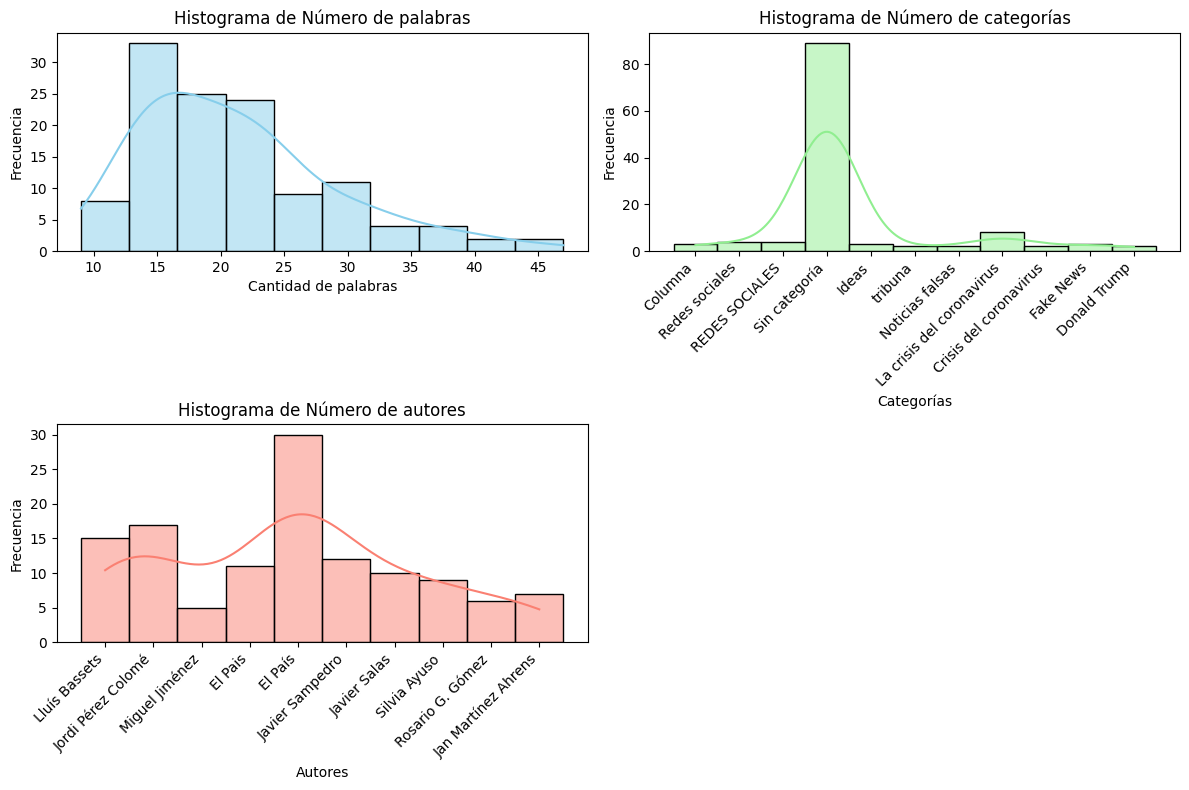

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lee el archivo CSV con los datos
df = pd.read_csv('noticias_falsas_el_pais.csv', encoding='utf-8')

# Eliminar filas con valores faltantes en la columna "Descripción"
df = df.dropna(subset=['Descripción'])

# Obtener los 10 autores con más noticias falsas
top_10_autores = df['Autor'].value_counts().nlargest(10).index

# Obtener las 20 categorías con más noticias falsas
top_20_categorias = df['Categoría'].value_counts().nlargest(20).index

# Filtrar el DataFrame original para obtener solo las noticias falsas de los 10 autores y 20 categorías top
filtered_df = df[df['Autor'].isin(top_10_autores) & df['Categoría'].isin(top_20_categorias)].copy()

# Calcular la columna "Número de palabras" contando el número de palabras en cada descripción
filtered_df['Número de palabras'] = filtered_df['Descripción'].str.split().apply(len)

# Crear los cuatro gráficos
plt.figure(figsize=(12, 8))

# Gráfico 1: Número de palabras
plt.subplot(2, 2, 1)
sns.histplot(data=filtered_df, x='Número de palabras', color='skyblue', kde=True)
plt.title('Histograma de Número de palabras')
plt.xlabel('Cantidad de palabras')
plt.ylabel('Frecuencia')

# Gráfico 2: Número de categorías
plt.subplot(2, 2, 2)
sns.histplot(data=filtered_df, x='Categoría', color='lightgreen', kde=True)
plt.title('Histograma de Número de categorías')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(filtered_df['Categoría'].unique(), rotation=45, ha='right')

# Gráfico 3: Número de autores
plt.subplot(2, 2, 3)
sns.histplot(data=filtered_df, x='Autor', color='salmon', kde=True)
plt.title('Histograma de Número de autores')
plt.xlabel('Autores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(filtered_df['Autor'].unique(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

